In [159]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [160]:
star_wars=star_wars[pd.notnull(star_wars["RespondentID"])==True]


In [161]:
yes_no = {
    "Yes": True,
    "No": False
}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)


In [162]:
seen={
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    "NaN": False
    } 
def star_wars_rename(df,name,start,end):
    for x in range(start,end):
        new_name=name+'_'+str(x-start+1)
        df=df.rename(columns={df.columns[x]: new_name})
    return df    
#star_wars=star_wars.rename(columns={star_wars.columns[3]: "seen_1",star_wars.columns[4]: "seen_2",star_wars.columns[5]:"seen_3",star_wars.columns[6]: "seen_4", star_wars.columns[7]: "seen_5", star_wars.columns[8]:"seen_6"})
def star_wars_map(df,name,map_lib,start,end):
    for x in range(start, end):
        df[name+"_"+str(x)]=df[name+"_"+str(x)].map(map_lib)
    return df

star_wars=star_wars_rename(star_wars,"seen",3,9)
star_wars=star_wars_map(star_wars,"seen",seen,1,7)
#print(star_wars.head(3))

In [163]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
#star_wars=star_wars.rename(columns={star_wars.columns[9]: "ranking_1",star_wars.columns[10]: "ranking_2",star_wars.columns[11]:"ranking_3",star_wars.columns[12]: "ranking_4", star_wars.columns[13]: "ranking_5", star_wars.columns[14]:"ranking_6"})
star_wars=star_wars_rename(star_wars,"ranking",9,15)
#print(star_wars.head(3))

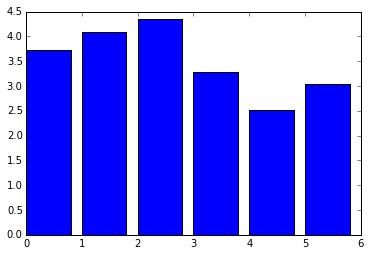

In [164]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def star_wars_mean(df,name):
    ranking_mean=[]
    ranking_column=[]
    df_names=df.columns.tolist()
    for item in df_names:
        if item.startswith(name):
            ranking_column.append(item)
            ranking_mean.append(df[item].mean())
    return ranking_mean
#print(ranking_mean)  
#print(ranking_column)
star_wars_ranking_mean=star_wars_mean(star_wars,"ranking")
N = 6
ind = np.arange(N)  # the x locations for the groups
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(ind,star_wars_ranking_mean)
plt.show()
#print(star_wars.head(3))

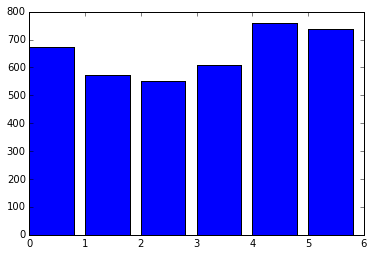

In [165]:
def star_wars_sum(df,name):
    seen_sum=[]
    seen_column=[]
    df_names=df.columns.tolist()
    for item in df_names:
        if item.startswith(name):
            seen_column.append(item)
            seen_sum.append(df[item].sum())
    return seen_sum
#print(seen_sum)
#print(seen_column)
star_wars_seen_sum=star_wars_sum(star_wars,"seen")
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(ind,star_wars_seen_sum)
plt.show()

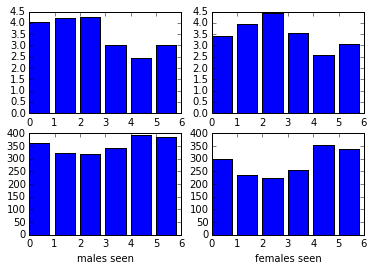

In [166]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
males_seen_sum=star_wars_sum(males,"seen")
females_seen_sum=star_wars_sum(females,"seen")
males_ranking_mean=star_wars_mean(males,"ranking")
females_ranking_mean=star_wars_mean(females,"ranking")
fig=plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.bar(ind,males_ranking_mean)
ax2.bar(ind,females_ranking_mean)
ax3.bar(ind,males_seen_sum)
ax4.bar(ind,females_seen_sum)
ax1.set_xlabel("males ranking")
ax2.set_xlabel("females ranking")
ax3.set_xlabel("males seen")
ax4.set_xlabel("females seen")
plt.show()
#print(star_wars.head(3))
#print(males)

In [171]:
#print(star_wars.columns)
print(star_wars.head(3))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1    3292879998                                               True             
2    3292879538                                              False             
3    3292765271                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      

  seen_1 seen_2 seen_3 seen_4 seen_5 seen_6  ranking_1  \
1   True   True   True   True   True   True          3   
2    NaN    NaN    NaN    NaN    NaN    NaN        NaN   
3   True   True   True    NaN    NaN    NaN          1   

             ...             character_14       Which character shot first?  \
1            ...                        3  I don't understand this

In [167]:
star_wars=star_wars_rename(star_wars,"character",15,29)
favorate={
    "Very favorably":3,
    "Somewhat favorably":2,
    "Neither favorably nor unfavorably (neutral)":1,
    "Nan":0
}
star_wars=star_wars_map(star_wars,"character",favorate,1,15)
#print(star_wars.head(3))
character_favorate_sum=star_wars_sum(star_wars,"character")
character_favorate_mean=star_wars_mean(star_wars,"character")
print(character_favorate_sum)
print(character_favorate_mean)

[2176.0, 2132.0, 2109.0, 1408.0, 2134.0, 829.0, 1356.0, 1108.0, 968.0, 1959.0, 2113.0, 760.0, 1077.0, 2154.0]
[2.7031055900621119, 2.6353522867737946, 2.6198757763975156, 2.1694915254237288, 2.691046658259773, 1.7789699570815452, 2.3999999999999999, 1.843594009983361, 1.7959183673469388, 2.5051150895140664, 2.6281094527363185, 1.8719211822660098, 1.9301075268817205, 2.6924999999999999]


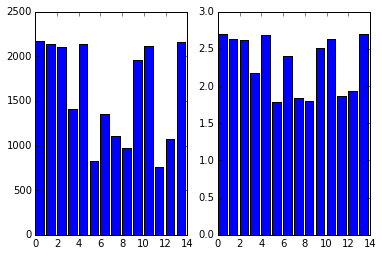

In [169]:
N = 14
ind = np.arange(N)  # the x locations for the groups
fig=plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(ind,character_favorate_sum)
ax2.bar(ind,character_favorate_mean)
plt.show()